In [10]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import sklearn
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model.coordinate_descent import ConvergenceWarning
from sklearn.model_selection import train_test_split

In [2]:
## 设置字符集，防止中文乱码
mpl.rcParams['font.sans-serif']=[u'simHei']
mpl.rcParams['axes.unicode_minus']=False
## 拦截异常
warnings.filterwarnings(action = 'ignore', category=ConvergenceWarning)
warnings.filterwarnings(action = 'ignore', category=UserWarning)

In [3]:
## 读取数据
path1 = "datas/winequality-red.csv"
df1 = pd.read_csv(path1, sep=";")
df1['type'] = 1 # 设置数据类型为红葡萄酒
print(df1.head())

path2 = "datas/winequality-white.csv"
df2 = pd.read_csv(path2, sep=";")
df2['type'] = 2 # 设置数据类型为白葡萄酒
print(df2.head())

# 合并两个df
df = pd.concat([df1,df2], axis=0)
print(df.head())

## 自变量名称
names = ["fixed acidity","volatile acidity","citric acid",
         "residual sugar","chlorides","free sulfur dioxide",
         "total sulfur dioxide","density","pH","sulphates",
         "alcohol", "type"]

## 因变量名称
quality = "quality"

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  type  
0      9.4        5     1  
1      9.8        5     1  
2 

In [4]:
names1=[]
for i in list(df):
    names1.append(i)
print(names1)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'type']


In [5]:
## 异常数据处理
new_df = df.replace('?', np.nan)
datas = new_df.dropna(how = 'any') # 只要有列为空，就进行删除操作

X = datas[names]
Y = datas[quality]
Y.ravel()

array([5, 5, 5, ..., 6, 7, 6], dtype=int64)

In [11]:
## 创建模型列表
models = [
    Pipeline([
            ('ss', StandardScaler()),
            ('Poly', PolynomialFeatures()),
            ('Linear', LinearRegression())
        ]),
    Pipeline([
            ('ss', StandardScaler()),
            ('Poly', PolynomialFeatures()),
            ('Linear', RidgeCV(alphas=np.logspace(-4, 2, 20)))
        ]),
    Pipeline([
            ('ss', StandardScaler()),
            ('Poly', PolynomialFeatures()),
            ('Linear', LassoCV(alphas=np.logspace(-4, 2, 20)))
        ]),
    Pipeline([
            ('ss', StandardScaler()),
            ('Poly', PolynomialFeatures()),
            ('Linear', ElasticNetCV(alphas=np.logspace(-4,2, 20), l1_ratio=np.linspace(0, 1, 5)))
        ])
]

In [12]:
plt.figure(figsize=(16,8), facecolor='w')
titles = u'线性回归预测', u'Ridge回归预测', u'Lasso回归预测', u'ElasticNet预测'

## 将数据分为训练数据和测试数据
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.01, random_state=0)
ln_x_test = range(len(X_test))

## 给定阶以及颜色
d_pool = np.arange(1,4,1) # 1 2 3 阶
m = len(d_pool)
clrs = [] # 颜色
for c in np.linspace(5570560, 255, m):
    clrs.append('#%06x' % int(c))

<Figure size 1152x576 with 0 Axes>

线性回归预测:1阶, 截距:5, 系数: [ 0.          0.11040709 -0.2447646  -0.01003919  0.29679135 -0.02521036
  0.08869715 -0.08212943 -0.31033336  0.08008173  0.10723339  0.26598975
 -0.15162781]
线性回归预测:2阶, 截距:-1761394584, 系数: [ 6.20380155e-17  1.58689197e-01 -2.46882664e-01  1.69949941e-02
  4.11317569e-01 -7.52662915e-02  1.13872095e-01 -6.18118600e-02
 -4.72107511e-01  7.83963727e-02  1.21023367e-01  1.47585029e-01
  2.06782479e+09 -7.32465820e-02  7.11111422e-03  8.02068604e-02
 -1.43378212e-01 -1.09472712e-01 -1.64274010e-03  2.66708621e-02
  1.08704616e-01  1.93605252e-02  4.00105393e-02  2.08353882e-02
  3.06262331e-02  1.18681414e-02  2.09728725e-02 -3.01345617e-02
  6.34652650e-03  1.71785305e-02  6.71395454e-02 -5.40190655e-02
  2.50434879e-02  9.56464322e-03  6.20075180e-02 -8.53942680e-02
 -2.20071014e-02  4.64502753e-02  3.34216238e-02  2.16639257e-02
 -4.27211333e-03 -1.13069554e-01  3.61593076e-02 -1.10487838e-02
 -2.24595475e-03  4.11305098e-02 -2.10165955e-01 -1.17398299e-01
 -1.0611

Ridge回归预测:2阶, 截距:5, 系数: [ 0.          0.08275783 -0.23884816  0.01599653  0.26119619 -0.08362728
  0.12004    -0.07267054 -0.26517174  0.03819337  0.10256955  0.23468219
 -0.00396462 -0.04825198 -0.00883335  0.05010119 -0.03676965 -0.07850255
  0.02820571 -0.01109593  0.01112835  0.0276393   0.03381394 -0.003876
 -0.02658932  0.00744312  0.01760545 -0.03199299  0.00797545  0.01711571
  0.05579044 -0.02750546  0.01329577  0.0052846   0.07177709 -0.08434906
 -0.02136705  0.01761446  0.02729127  0.02147027 -0.00438237 -0.06285299
  0.02135613 -0.01327251  0.02021069  0.03887213 -0.09966033 -0.0739423
 -0.04974899  0.0636741   0.02909812 -0.0395255  -0.0286424   0.03975268
  0.02512283 -0.00035493  0.01261669 -0.0234715   0.06792685 -0.05628242
 -0.03610288 -0.00575167 -0.02465593 -0.01537164 -0.04427523  0.02513547
  0.02216782  0.05522624  0.06263196  0.12755256 -0.02667958 -0.04749231
 -0.01263222 -0.09153218 -0.02464878  0.06453568  0.08777964 -0.09050623
 -0.01027005 -0.03018789 -0.06

Lasso回归预测:2阶, 截距:5, 系数: [ 0.          0.05799044 -0.24353163  0.          0.22451713 -0.04850041
  0.10844589 -0.06978754 -0.19417917  0.02546472  0.09580412  0.28176824
 -0.         -0.0298128  -0.01091974  0.00103181 -0.         -0.01845208
  0.00446768 -0.          0.          0.01660398  0.01733717 -0.
 -0.0338844   0.          0.00212355 -0.02531503  0.          0.00191676
  0.0382082  -0.          0.         -0.          0.07364765 -0.08030923
 -0.01242364 -0.          0.00755288  0.00728249  0.         -0.02817033
  0.         -0.00671679  0.01804193  0.00045745 -0.07173511 -0.03568124
 -0.02694284  0.01950472 -0.         -0.03483914 -0.02307594  0.
  0.0009419   0.00120014  0.         -0.00480183  0.         -0.02687089
 -0.02295723 -0.01542938 -0.01045288 -0.02301732 -0.02198666 -0.
  0.00652071  0.04884383  0.04874763  0.08617524 -0.02564348 -0.
 -0.         -0.09824335 -0.          0.07384981  0.0748078  -0.06344806
  0.         -0.00895551 -0.01302466  0.          0.0303538

ElasticNet预测:1阶, 截距:5, 系数: [ 0.          0.09757515 -0.24330357 -0.00957     0.27401953 -0.02651764
  0.08951573 -0.08440476 -0.2764092   0.07264216  0.1051266   0.2785502
 -0.13862028]
ElasticNet预测:2阶, 截距:5, 系数: [ 0.          0.0362681  -0.20887789  0.02118335  0.14785153 -0.08244513
  0.11176873 -0.06790149 -0.14596437  0.02028037  0.08731494  0.26338529
  0.00338448 -0.03819883 -0.01239673  0.0241402  -0.01241671 -0.04456524
  0.02201177 -0.01145687  0.01055943  0.01741691  0.0266415  -0.00325087
 -0.03401903  0.00066948  0.01180449 -0.02507416  0.00764003  0.01332383
  0.03076585 -0.01275455  0.00817731  0.00363611  0.06849133 -0.06245682
 -0.02147376  0.00059664  0.01791644  0.01825957 -0.00533846 -0.03416162
  0.01115569 -0.01016164  0.02794849  0.02834204 -0.06148183 -0.04139613
 -0.02952106  0.04062577  0.00224227 -0.03867984 -0.03242916  0.0140033
  0.02491754  0.00174302  0.00825194 -0.02561132  0.02983631 -0.03913018
 -0.03018193 -0.0162024  -0.01540693 -0.02079667 -0.025087

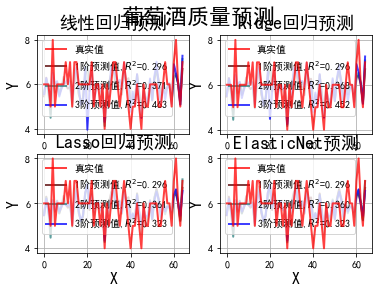

In [13]:
for t in range(4):  # 第一个循环选择模型
    plt.subplot(2, 2, t + 1)
    model = models[t]
    plt.plot(ln_x_test, Y_test, c='r', lw=2, alpha=0.75, zorder=10, label=u'真实值')
    for i,d in enumerate(d_pool):  # 第二个循环选择阶数
        # 设置参数
        model.set_params(Poly__degree=d)
        # 模型训练
        model.fit(X_train, Y_train)
        # 模型预测及计算R^2
        Y_pre = model.predict(X_test)
        R = model.score(X_train, Y_train)
        # 输出信息
        lin = model.get_params('Linear')['Linear']
        output = u"%s:%d阶, 截距:%d, 系数:" % (titles[t], d, lin.intercept_)
        print(output, lin.coef_)
        ## 图形展示
        plt.plot(ln_x_test, Y_pre, c=clrs[i], lw=2,alpha=0.75, zorder=i, label=u'%d阶预测值,$R^2$=%.3f' % (d,R))
    plt.legend(loc = 'upper left')
    plt.grid(True)
    plt.title(titles[t], fontsize=18)
    plt.xlabel('X', fontsize=16)
    plt.ylabel('Y', fontsize=16)
plt.suptitle(u'葡萄酒质量预测', fontsize=22)
plt.show()